In [1]:
from collections import defaultdict
import glob
from itertools import groupby
import operator
import os
import re

import numpy as np
import pandas as pd
import pickle
import random
import sparse
#import tensorly as tl
#import tensorly.decomposition as decomp
import sktensor
import urllib3
#import wget

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams.update({'font.size': 14})

import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

if not os.path.exists('cp_orth.py'):
    wget.download('http://web.stanford.edu/~vsharan/cp_orth.py')
from cp_orth import orth_als

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
def show_expers(weight='log_freq', feature='fit'):
    i = {'fit':2, 'exectimes': 3}[feature]
    projdir = '/mnt/store/home/makrai/project/verb-tensor/just_svo/depCC/'
    tabular = []
    mx = []
    for filen in glob.glob(os.path.join(projdir, 'ktensor_{}*.pkl'.format(weight))):
        _, cutoff, dim = os.path.splitext(filen)[0].rsplit('_', 2)
        cutoff, dim = map(int, (cutoff, dim))
        ktensor, fit, n_iterations, exectimes = pickle.load(open(filen, mode='rb'))
        tabular.append((cutoff, dim, ktensor.shape))
        mx.append([cutoff, dim, fit, sum(exectimes)/60])
    mx = np.array(mx)
    #print('\n'.join(map(str, sorted(tabular, reverse=True))))
    plt.scatter(np.array(mx).T[0], mx.T[1], c=mx.T[i], norm=matplotlib.colors.LogNorm())
    cbar = plt.colorbar()
    cbar.set_label(feature)
    plt.xscale('log', basex=2)
    plt.yscale('log', basey=2)
    plt.xlabel('cutoff')
    plt.ylabel('rank')

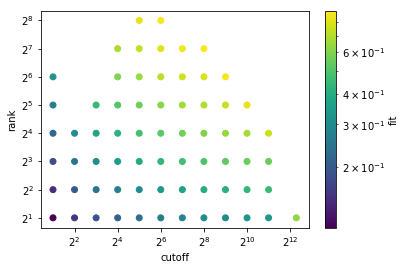

In [9]:
_ = show_expers()

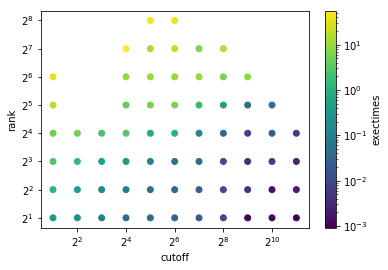

In [22]:
_ = show_expers(weight='salience', feature='exectimes')